<h1 class="edatitle" style="
    font-family: 'Orbitron', sans-serif;
    font-size: 4rem;
    color: #fff;
    text-align: center;
    letter-spacing: 0.1em;
    text-shadow: 0 4px 24px #3c2f54ff, 0 2px 8px #3d75c3ff;
    margin: 0;
    background: linear-gradient(135deg, #2e6579ff 0%rgba(55, 41, 185, 1)b9 50%, #5a2564ff 100%);
    padding: 1rem 0;
">
    EDA BASICS
</h1>


# Handling Missing Values

## we can handle missing values by using deletion or imputation
refer notes pg 48

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv(f"/Users/gabi/Desktop/DA_practice/Datasets/fifa_eda.csv")
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

## DENSITY PLOT (KDE)
A density plot, also known as a Kernel Density Estimate (KDE), is a smooth curve that shows the distribution of a continuous variable. Unlike a histogram, which uses discrete bins, KDE estimates the probability density function of the variable, making it easier to visualize the underlying distribution and spot patterns such as skewness or multimodality. In the previous cell, the `kde=True` argument in `sns.histplot` overlays the KDE curve on the histogram of player ages, providing a clearer view of how ages are distributed in the dataset.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


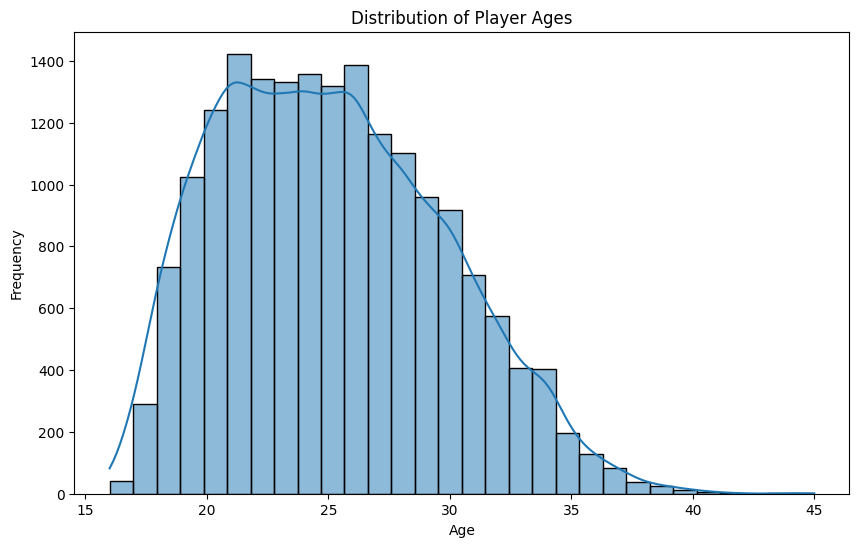

In [4]:
#histogram of age
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Rug Plot

A rug plot is a simple visualization that displays individual data points along an axis, typically as small vertical lines ("rugs") at the bottom of a plot. It is useful for showing the distribution and density of data, especially when combined with other plots like histograms or KDEs. In exploratory data analysis, rug plots help to identify clusters, gaps, and outliers in the data by providing a clear view of where each observation lies. Rug plots are often used in conjunction with seaborn's `sns.rugplot()` function.

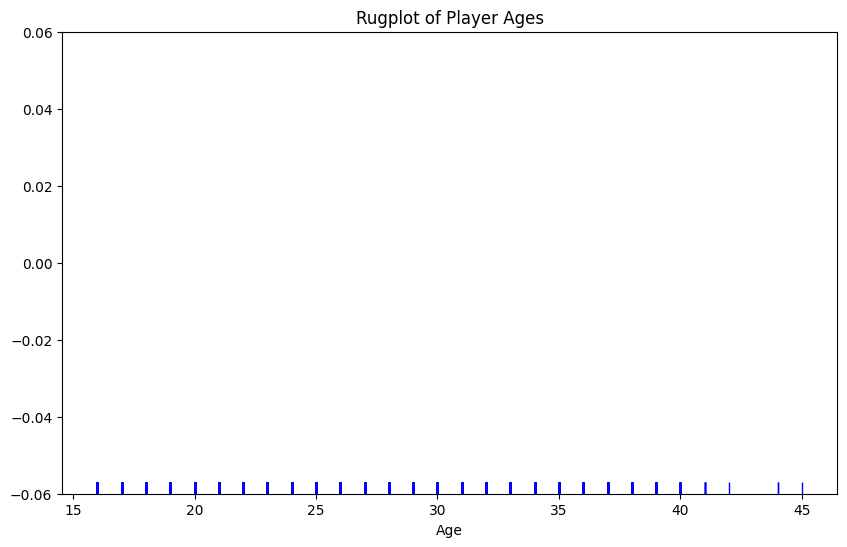

In [5]:
#rugplot data
plt.figure(figsize=(10,6))
sns.rugplot(data['Age'], color='blue')
plt.title('Rugplot of Player Ages')
plt.xlabel('Age')
plt.show()

# CDF
The cumulative distribution function (CDF) describes the probability that a random variable takes a value less than or equal to a specific value. For a given value x, the CDF gives the proportion of data points in the dataset that are less than or equal to x. In exploratory data analysis, plotting the CDF helps visualize how data accumulates and can reveal information about the distribution, such as skewness, percentiles, and outliers. CDF plots are useful for comparing distributions and understanding the likelihood of observing values within certain ranges.

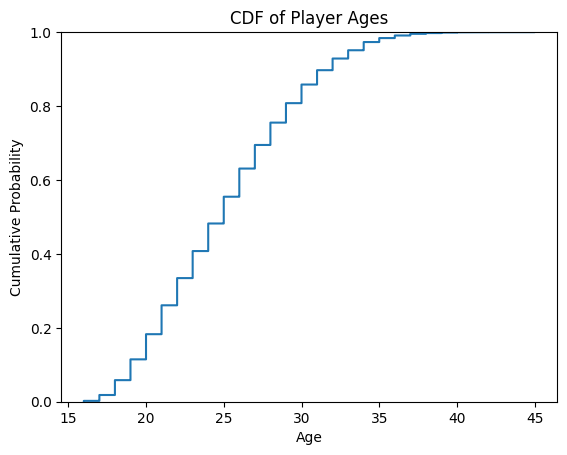

In [6]:
#cdf for the data
sns.ecdfplot(data['Age'])
plt.title('CDF of Player Ages')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.show()

## SCATTERplot
A scatterplot is a type of data visualization that displays individual data points as dots on a two-dimensional graph. Each point represents the values of two variables, with one variable plotted along the x-axis and the other along the y-axis. Scatterplots are useful for identifying relationships, patterns, and correlations between variables, as well as spotting outliers and clusters in the data. In exploratory data analysis, scatterplots help to visually assess whether variables are linearly related, independent, or have more complex associations.

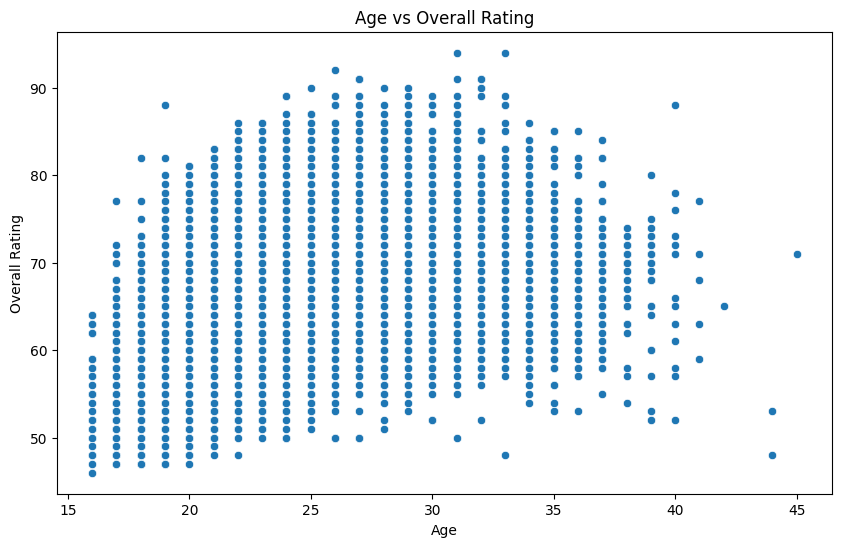

In [7]:
##scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Overall', data=data)
plt.title('Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

# Pairplot (scatter matrix)
A pairplot (scatter matrix) is a grid of scatterplots that visualizes the relationships between multiple numerical variables in a dataset. Each cell in the grid shows the scatterplot between two variables, while the diagonal often displays the distribution (histogram or KDE) of each variable. Pairplots are useful for quickly spotting correlations, clusters, and outliers, and for understanding the overall structure of the data. In seaborn, the `sns.pairplot()` function creates pairplots easily, allowing you to explore interactions between features in your dataframe.


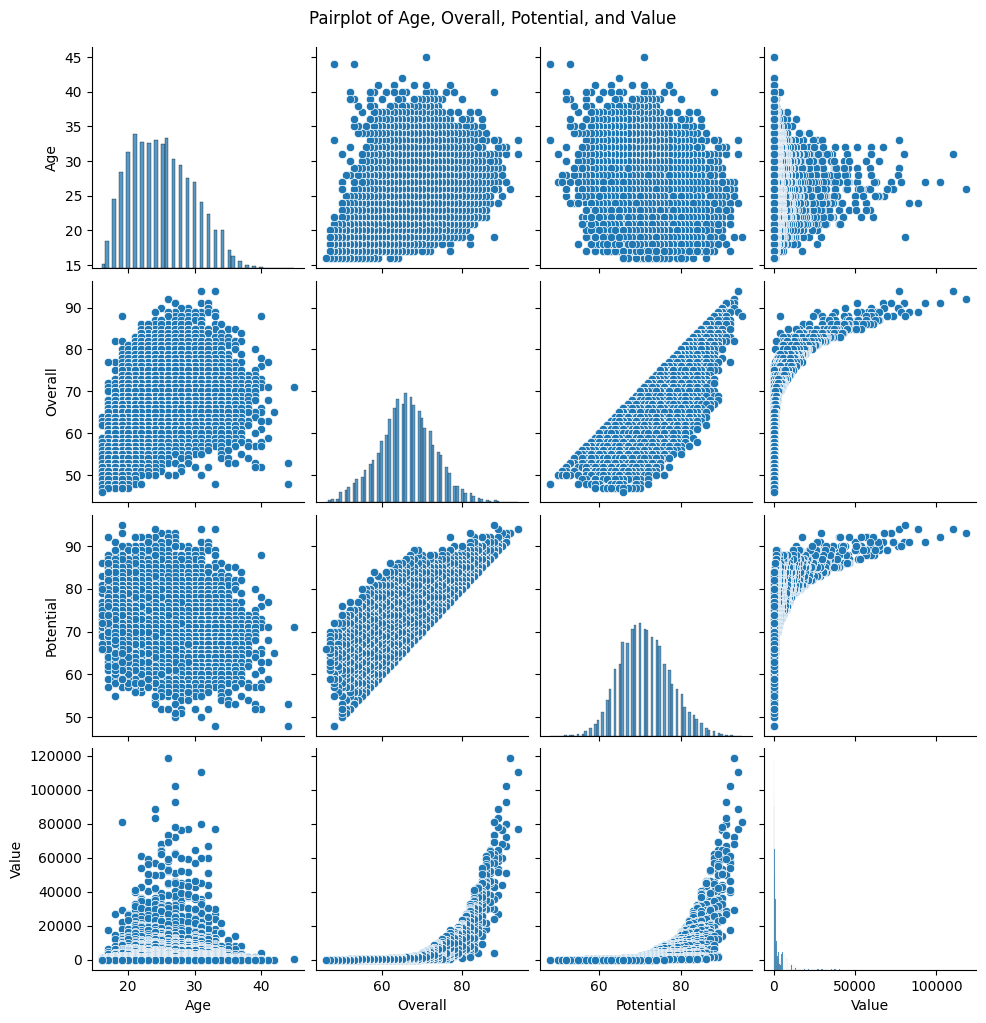

In [8]:
#pairplot (scatter matrix)
sns.pairplot(data[['Age', 'Overall', 'Potential', 'Value']])
plt.suptitle('Pairplot of Age, Overall, Potential, and Value', y=1.02)
plt.show()

## Bubble Chart

A bubble chart is a type of data visualization that extends the scatterplot by incorporating a third dimension through the size of the bubbles. Each bubble represents a data point, with its position on the x and y axes determined by two variables, and its size representing a third variable (often a quantitative measure like population or value). Bubble charts are useful for exploring relationships between multiple variables, identifying clusters, correlations, and outliers, and comparing categories or groups. They provide a compact way to display complex data, making them ideal for exploratory data analysis. In libraries like matplotlib or seaborn, bubble charts can be created using scatterplots with the `s` parameter for size.

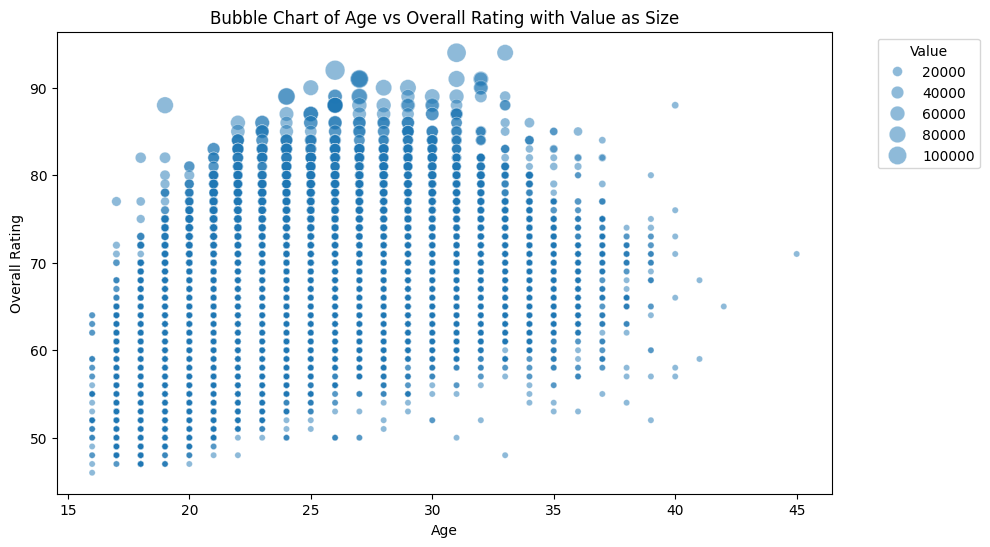

In [9]:
#bubble chart 
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Overall', size='Value', data=data, sizes=(20, 200), alpha=0.5)
plt.title('Bubble Chart of Age vs Overall Rating with Value as Size')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Hexbin Plot

A hexbin plot is a type of bivariate data visualization that uses hexagonal bins to represent the density of data points in a two-dimensional space. Unlike scatterplots, which can become cluttered with overlapping points, hexbin plots aggregate data into hexagonal cells and color-code them based on the number of points in each bin, making it easier to identify areas of high and low density. This is particularly useful for large datasets where traditional scatterplots might be hard to interpret. In libraries like matplotlib, hexbin plots can be created using the `plt.hexbin()` function, which helps in exploratory data analysis by revealing patterns, correlations, and distributions between two continuous variables.

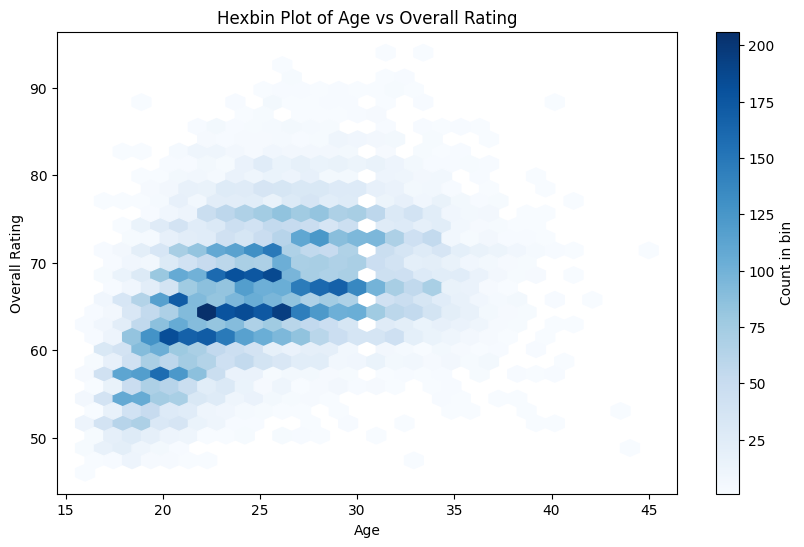

In [10]:
#hexbin plot
plt.figure(figsize=(10,6))
plt.hexbin(data['Age'], data['Overall'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')
plt.title('Hexbin Plot of Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

## Strip Plot

A strip plot is a type of data visualization that displays individual data points as dots along an axis, typically used to show the distribution of a continuous variable across categories. Each dot represents a single observation, and they are jittered (slightly spread out) to avoid overlap, making it easier to see the density and spread of data points. Strip plots are particularly useful in exploratory data analysis for comparing distributions across groups, identifying outliers, and visualizing the relationship between a categorical variable and a numerical one. In seaborn, the `sns.stripplot()` function creates strip plots, often combined with other plots like box plots for enhanced insights. For example, in the FIFA dataset, a strip plot could illustrate how player ages vary by position or nationality.

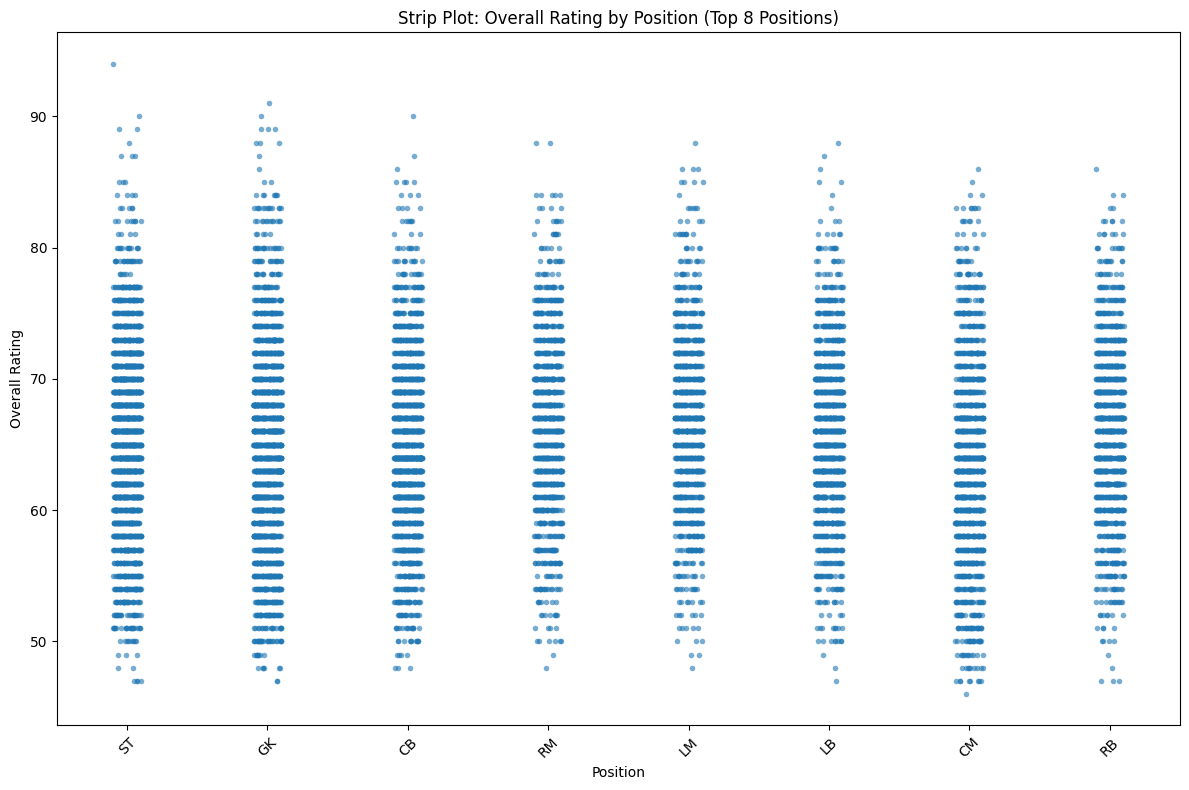

In [11]:
#strip plot
plt.figure(figsize=(12,8))
# Select top 8 positions for cleaner visualization
top_positions = data['Position'].value_counts().head(8).index
filtered_data = data[data['Position'].isin(top_positions)]
sns.stripplot(x='Position', y='Overall', data=filtered_data, jitter=True, size=4, alpha=0.6)
plt.title('Strip Plot: Overall Rating by Position (Top 8 Positions)')
plt.xlabel('Position')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Swarm Plot

A swarm plot is similar to a strip plot but uses an algorithm to adjust the positions of points along the categorical axis to avoid overlap, creating a "swarming" effect. This provides a clear view of the distribution shape and density without points overlapping. Swarm plots are particularly useful for smaller to medium-sized datasets where you want to see every individual data point while maintaining readability. They help identify patterns, outliers, and the actual distribution shape within each category. In seaborn, the `sns.swarmplot()` function creates these plots, making it easy to visualize distributions across categorical variables.

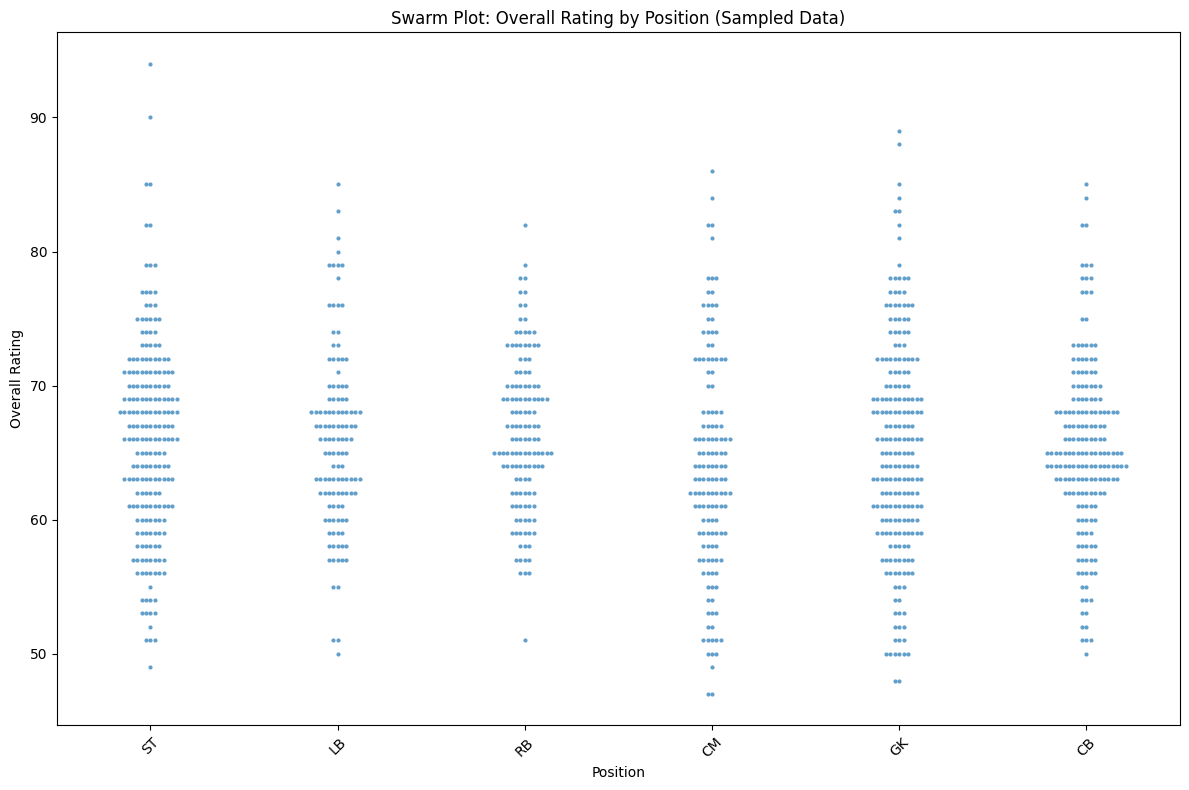

In [12]:
#swarm plot
plt.figure(figsize=(12,8))
# Select top 6 positions and sample data for cleaner swarm plot
top_positions = data['Position'].value_counts().head(6).index
filtered_data = data[data['Position'].isin(top_positions)].sample(n=1000, random_state=42)
sns.swarmplot(x='Position', y='Overall', data=filtered_data, size=3, alpha=0.7)
plt.title('Swarm Plot: Overall Rating by Position (Sampled Data)')
plt.xlabel('Position')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bar Chart (Stacked/Grouped)

Bar charts are fundamental visualizations for displaying categorical data. They can show counts, means, or other aggregations across categories. Stacked bar charts show the composition of each category by stacking sub-categories on top of each other, while grouped bar charts place sub-categories side by side for easy comparison. These charts are essential for comparing quantities across categories and understanding the relative importance or frequency of different groups. Bar charts are particularly useful in EDA for exploring categorical variables and their relationships.

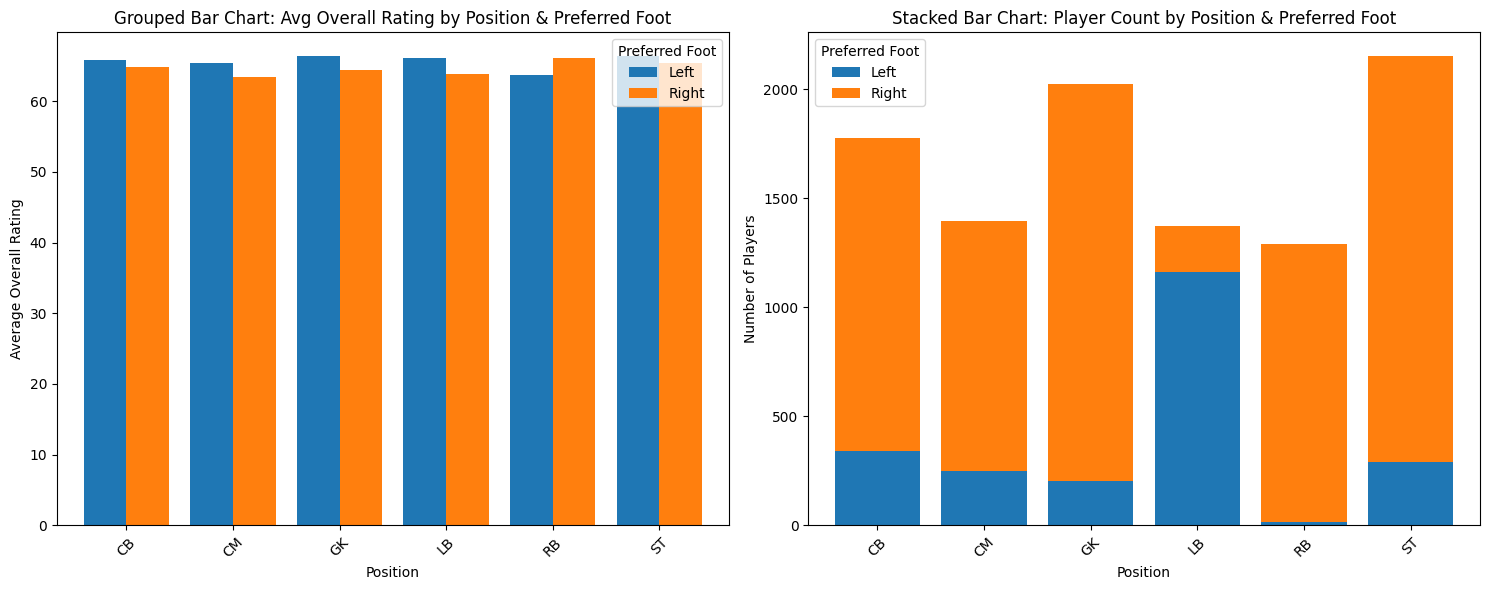

In [13]:
# Bar charts - grouped and stacked
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Grouped bar chart - Average Overall rating by Position and Preferred Foot
top_positions = data['Position'].value_counts().head(6).index
filtered_data = data[data['Position'].isin(top_positions)]
grouped_data = filtered_data.groupby(['Position', 'Preferred Foot'])['Overall'].mean().unstack()

grouped_data.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Grouped Bar Chart: Avg Overall Rating by Position & Preferred Foot')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Average Overall Rating')
axes[0].legend(title='Preferred Foot')
axes[0].tick_params(axis='x', rotation=45)

# Stacked bar chart - Count of players by Position and Preferred Foot
stacked_data = filtered_data.groupby(['Position', 'Preferred Foot']).size().unstack(fill_value=0)
stacked_data.plot(kind='bar', stacked=True, ax=axes[1], width=0.8)
axes[1].set_title('Stacked Bar Chart: Player Count by Position & Preferred Foot')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Number of Players')
axes[1].legend(title='Preferred Foot')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Count Plot

A count plot shows the frequency of observations in each categorical bin using bars. It's essentially a histogram for categorical variables, making it easy to see which categories are most or least common in your dataset. Count plots are fundamental in EDA for understanding the distribution of categorical variables and identifying imbalanced classes. They help in data quality assessment and can reveal patterns in categorical data that might influence analysis decisions.

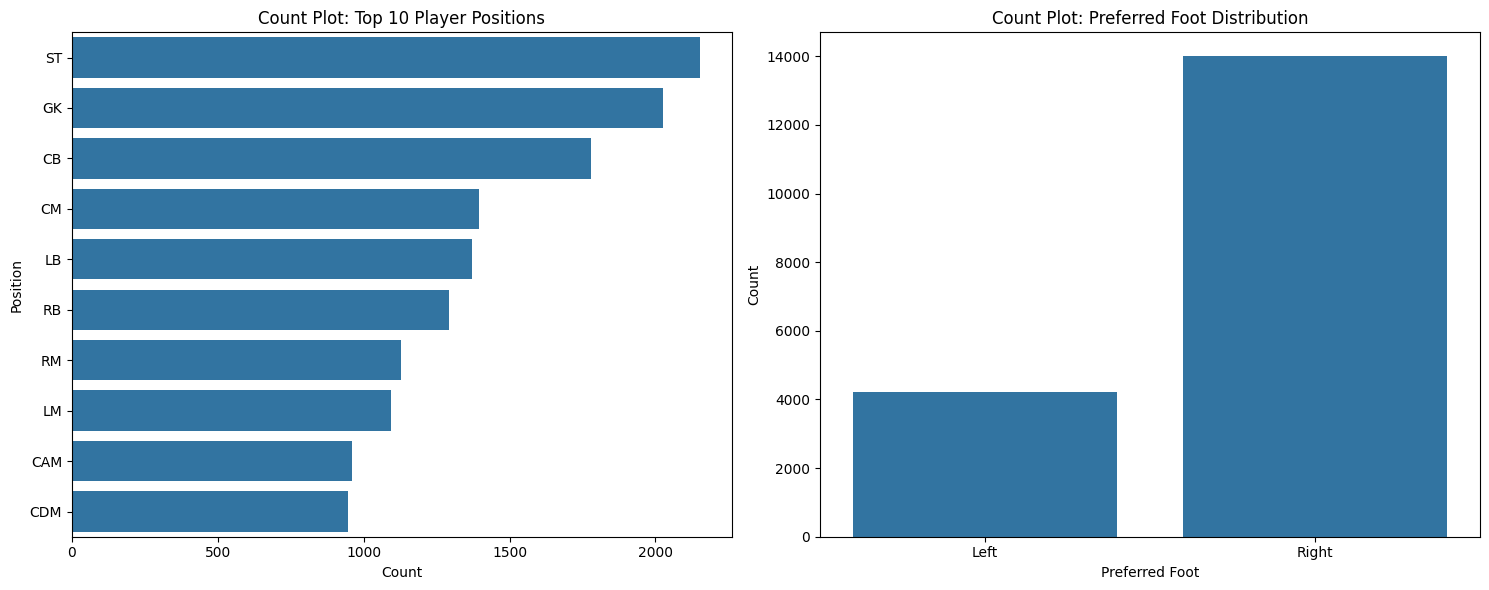

In [14]:
# Count plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot of positions
sns.countplot(data=data, y='Position', order=data['Position'].value_counts().head(10).index, ax=axes[0])
axes[0].set_title('Count Plot: Top 10 Player Positions')
axes[0].set_xlabel('Count')

# Count plot of preferred foot
sns.countplot(data=data, x='Preferred Foot', ax=axes[1])
axes[1].set_title('Count Plot: Preferred Foot Distribution')
axes[1].set_xlabel('Preferred Foot')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Correlation Heatmap

A correlation heatmap is a matrix visualization that displays the correlation coefficients between pairs of numerical variables using color intensity. It's one of the most important tools in EDA for understanding relationships between features. Strong positive correlations appear in darker colors (usually red), strong negative correlations in contrasting colors (usually blue), and weak correlations in neutral colors. Heatmaps help identify multicollinearity, feature redundancy, and potential predictive relationships in the data.

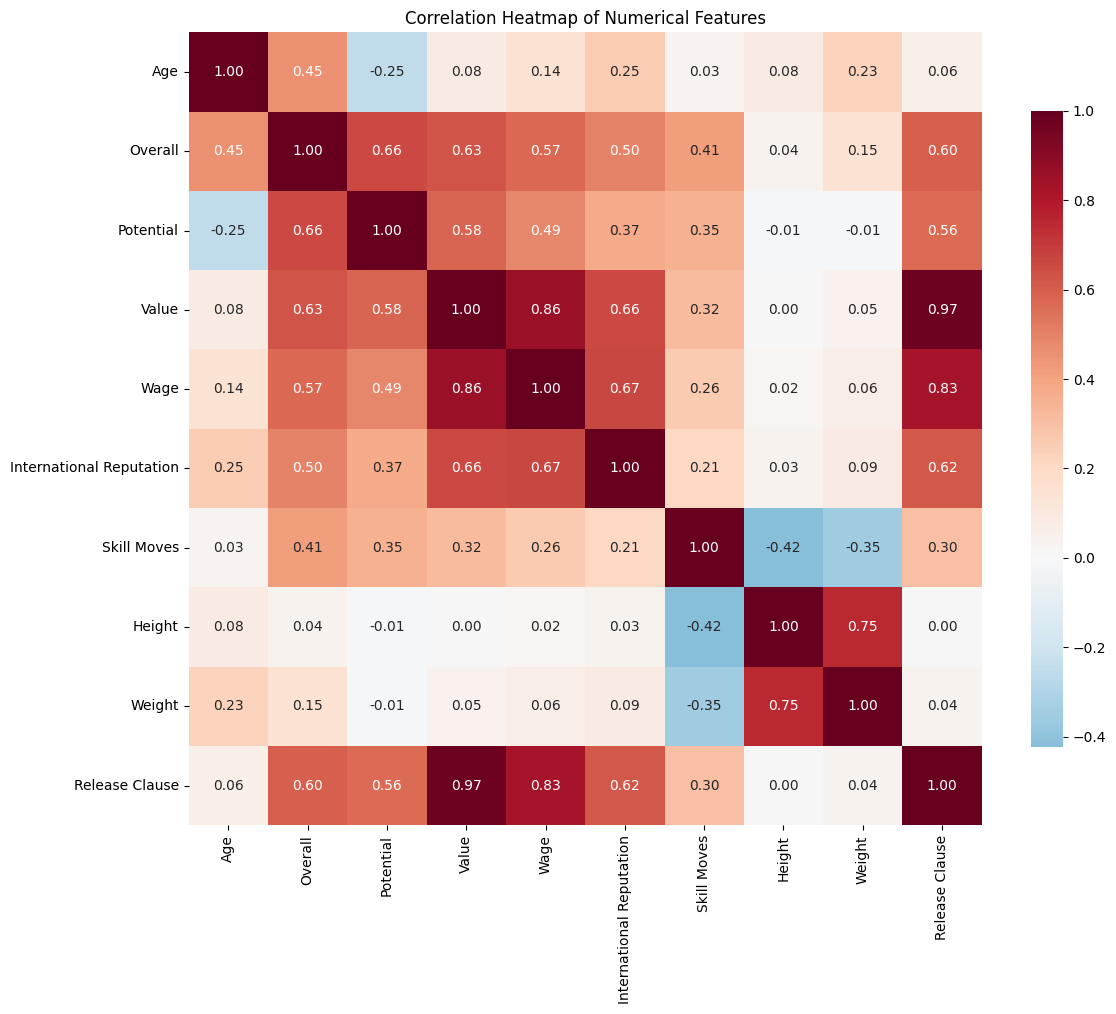

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
# Select numerical columns for correlation
numerical_cols = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 
                 'Skill Moves', 'Height', 'Weight', 'Release Clause']
correlation_matrix = data[numerical_cols].corr()

# Create heatmap with annotations
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0, 
            square=True, 
            fmt='.2f',
            cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

## Clustermap

A clustermap is a heatmap combined with hierarchical clustering that automatically reorders rows and columns to group similar features together. It creates dendrograms (tree structures) on the sides that show how features are related hierarchically. Clustermaps are excellent for discovering hidden patterns and groupings in correlation matrices, revealing which variables cluster together and potentially identifying latent factors or feature groups that behave similarly.

<Figure size 1200x1000 with 0 Axes>

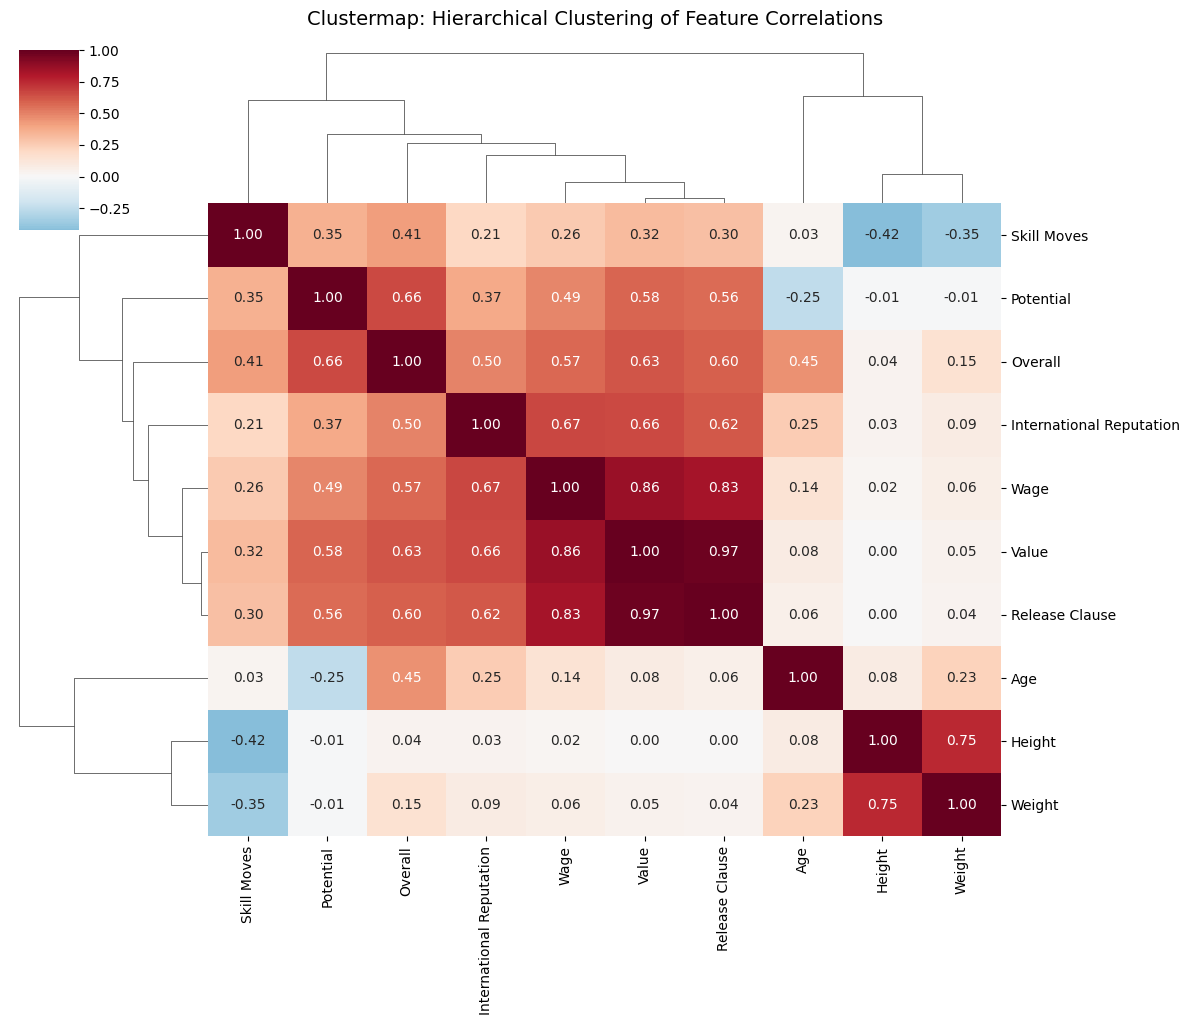

In [16]:
# Clustermap
plt.figure(figsize=(12, 10))
# Use the same numerical columns and correlation matrix
clustermap = sns.clustermap(correlation_matrix, 
                           cmap='RdBu_r', 
                           center=0, 
                           annot=True, 
                           fmt='.2f',
                           figsize=(12, 10))
clustermap.fig.suptitle('Clustermap: Hierarchical Clustering of Feature Correlations', 
                        y=1.02, fontsize=14)
plt.show()

## Box Plot

A box plot (box-and-whisker plot) displays the distribution of a dataset through its quartiles. The box shows the interquartile range (IQR), the line inside the box represents the median, and the whiskers extend to show the range of the data. Points beyond the whiskers are considered outliers. Box plots are excellent for comparing distributions across categories, identifying outliers, and understanding the spread and skewness of data. They provide a compact summary of the distribution's key statistics.

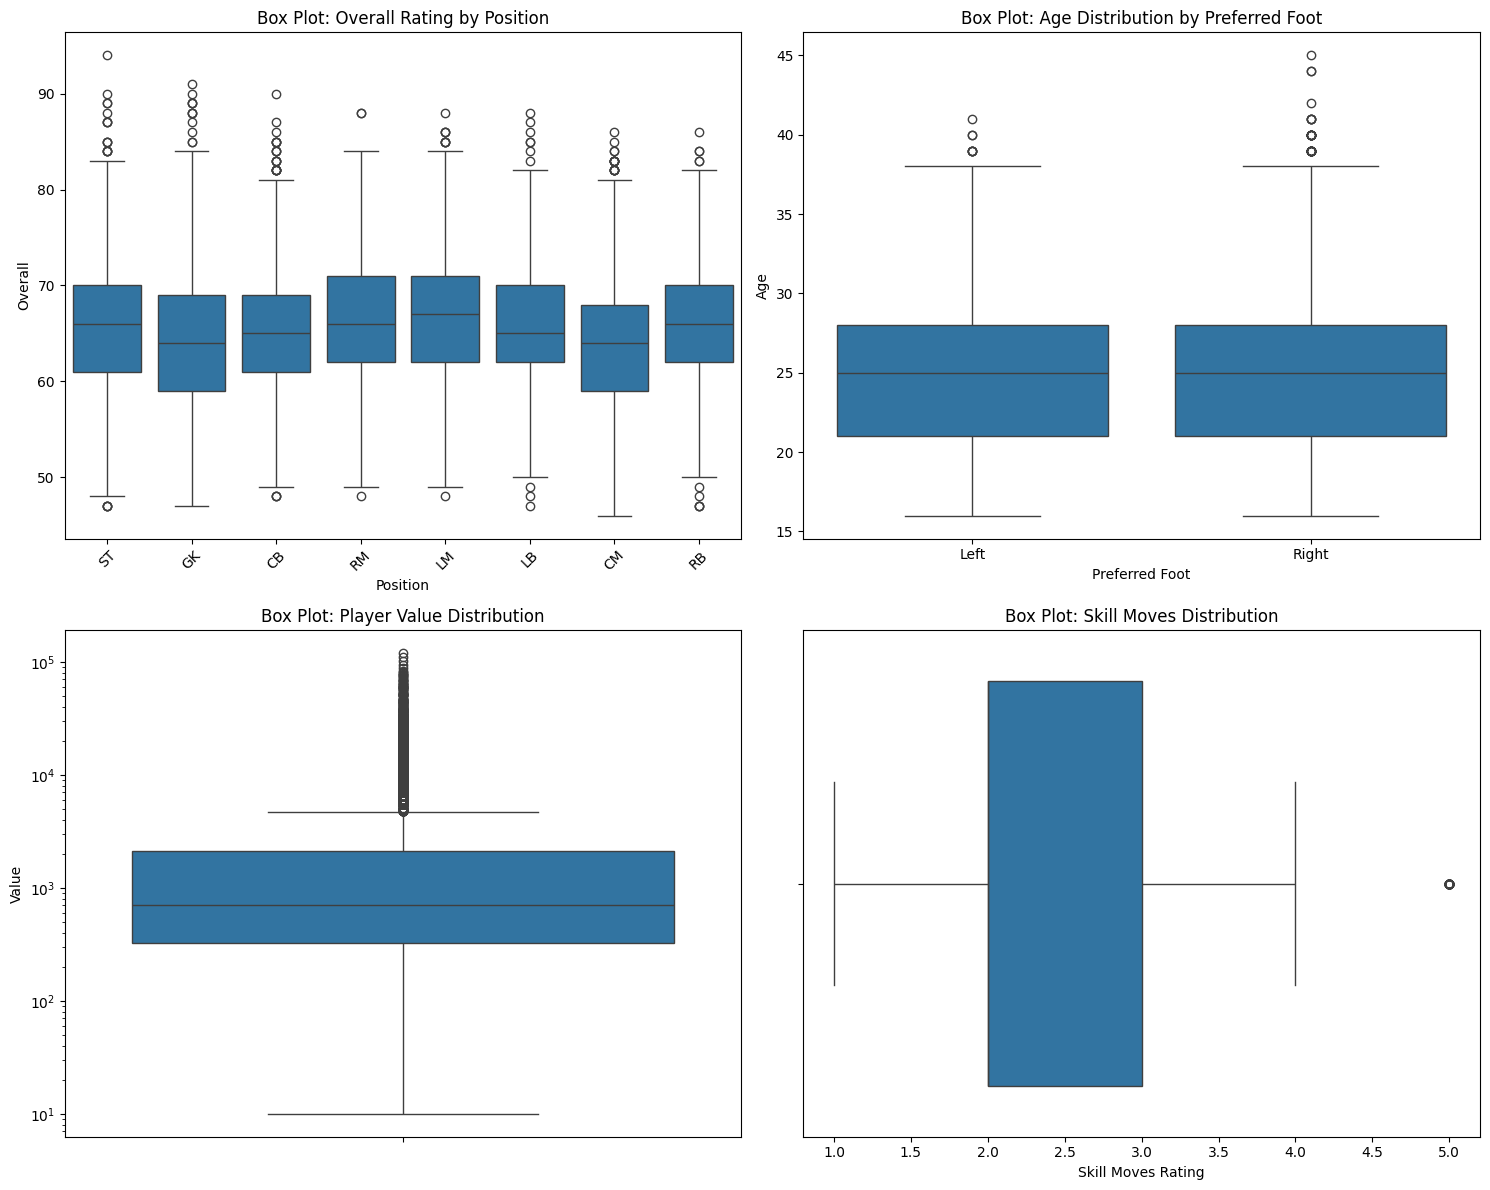

In [17]:
# Box plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Box plot 1: Overall rating by position
top_positions = data['Position'].value_counts().head(8).index
filtered_data = data[data['Position'].isin(top_positions)]
sns.boxplot(data=filtered_data, x='Position', y='Overall', ax=axes[0,0])
axes[0,0].set_title('Box Plot: Overall Rating by Position')
axes[0,0].tick_params(axis='x', rotation=45)

# Box plot 2: Age distribution by preferred foot
sns.boxplot(data=data, x='Preferred Foot', y='Age', ax=axes[0,1])
axes[0,1].set_title('Box Plot: Age Distribution by Preferred Foot')

# Box plot 3: Value distribution (log scale due to wide range)
data_with_value = data.dropna(subset=['Value'])
sns.boxplot(data=data_with_value, y='Value', ax=axes[1,0])
axes[1,0].set_title('Box Plot: Player Value Distribution')
axes[1,0].set_yscale('log')  # Log scale due to wide range

# Box plot 4: Skill moves distribution
data_with_skills = data.dropna(subset=['Skill Moves'])
sns.boxplot(data=data_with_skills, x='Skill Moves', ax=axes[1,1])
axes[1,1].set_title('Box Plot: Skill Moves Distribution')
axes[1,1].set_xlabel('Skill Moves Rating')

plt.tight_layout()
plt.show()

## Line Plot (Time-Series)

Line plots connect data points with lines and are primarily used for visualizing trends over time or continuous variables. In time-series analysis, line plots help identify patterns, trends, seasonality, and anomalies in temporal data. They're essential for understanding how variables change over time and for comparing multiple time series. Even with non-temporal data, line plots can show relationships between ordered categorical variables or demonstrate trends across ranked categories.

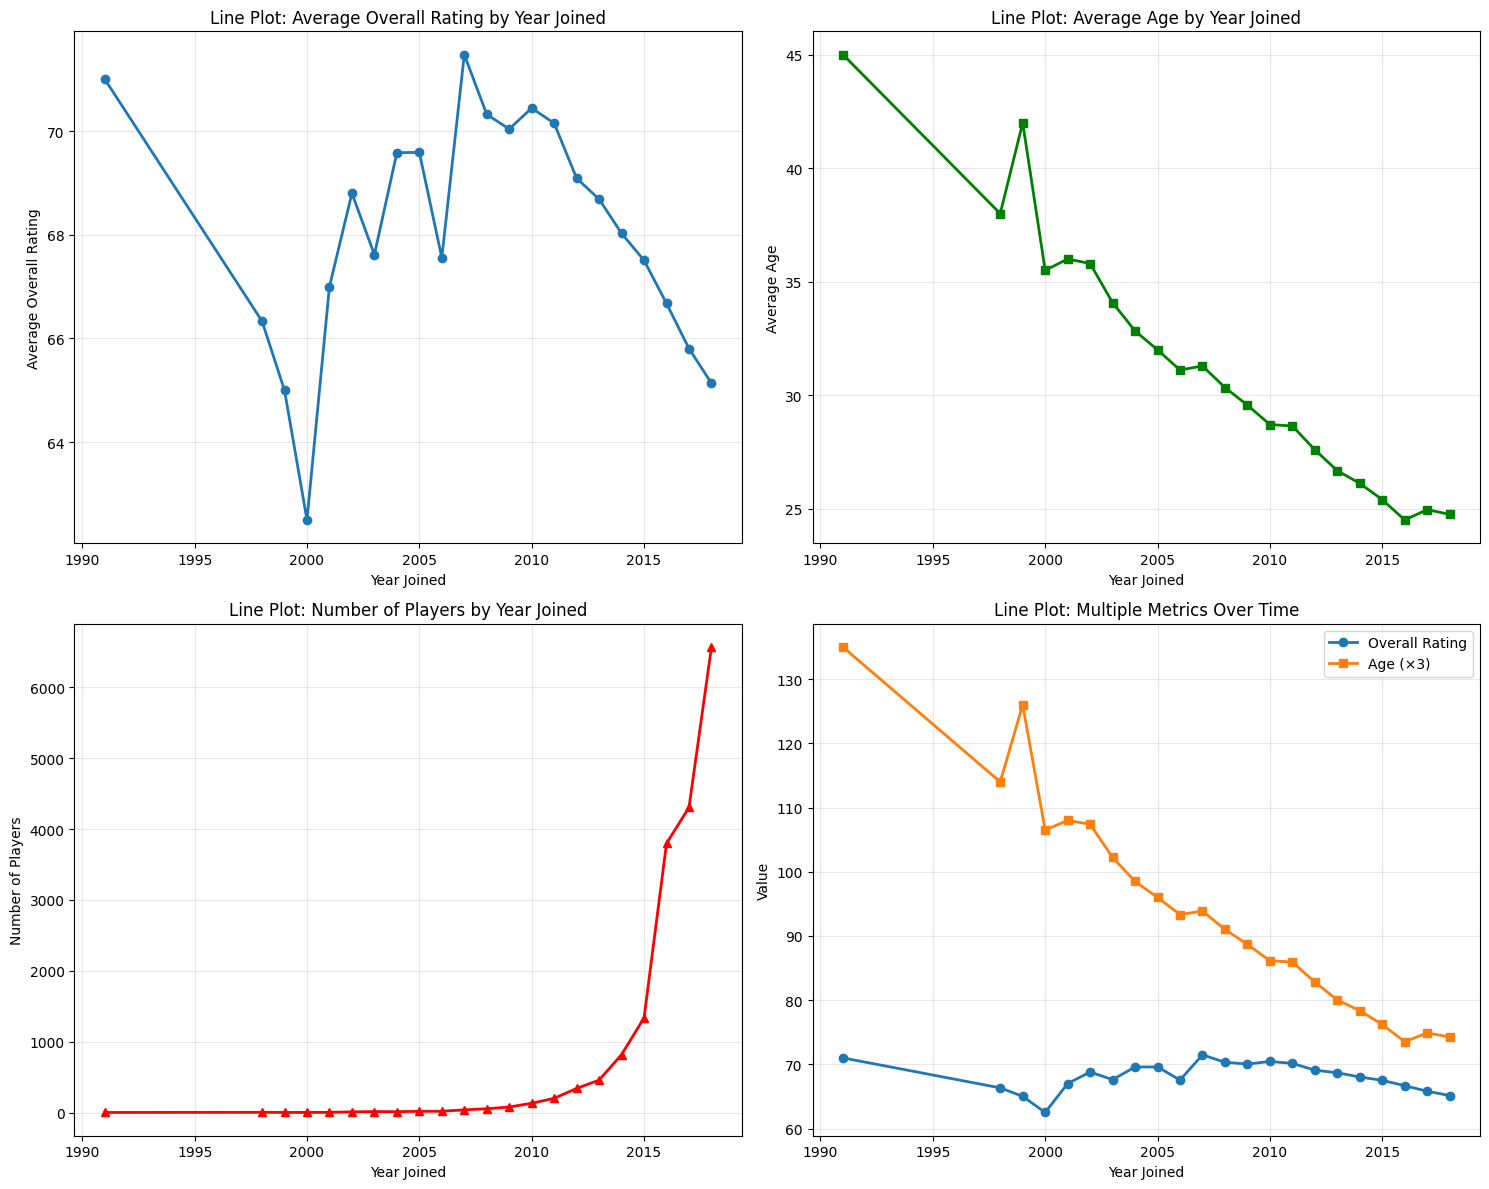

In [18]:
# Line plots - using 'Joined' year as time dimension
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Line plot 1: Average overall rating by year joined
yearly_stats = data.groupby('Joined').agg({
    'Overall': 'mean',
    'Age': 'mean',
    'Value': 'mean'
}).reset_index()

axes[0,0].plot(yearly_stats['Joined'], yearly_stats['Overall'], marker='o', linewidth=2)
axes[0,0].set_title('Line Plot: Average Overall Rating by Year Joined')
axes[0,0].set_xlabel('Year Joined')
axes[0,0].set_ylabel('Average Overall Rating')
axes[0,0].grid(True, alpha=0.3)

# Line plot 2: Average age by year joined
axes[0,1].plot(yearly_stats['Joined'], yearly_stats['Age'], marker='s', color='green', linewidth=2)
axes[0,1].set_title('Line Plot: Average Age by Year Joined')
axes[0,1].set_xlabel('Year Joined')
axes[0,1].set_ylabel('Average Age')
axes[0,1].grid(True, alpha=0.3)

# Line plot 3: Player count by year joined
player_counts = data['Joined'].value_counts().sort_index()
axes[1,0].plot(player_counts.index, player_counts.values, marker='^', color='red', linewidth=2)
axes[1,0].set_title('Line Plot: Number of Players by Year Joined')
axes[1,0].set_xlabel('Year Joined')
axes[1,0].set_ylabel('Number of Players')
axes[1,0].grid(True, alpha=0.3)

# Line plot 4: Multiple metrics over time
axes[1,1].plot(yearly_stats['Joined'], yearly_stats['Overall'], marker='o', label='Overall Rating', linewidth=2)
# Normalize age to fit on same scale (roughly)
normalized_age = yearly_stats['Age'] * 3  # Scale age to be comparable
axes[1,1].plot(yearly_stats['Joined'], normalized_age, marker='s', label='Age (×3)', linewidth=2)
axes[1,1].set_title('Line Plot: Multiple Metrics Over Time')
axes[1,1].set_xlabel('Year Joined')
axes[1,1].set_ylabel('Value')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Violin Plot

A violin plot combines a box plot with a kernel density estimation to show the distribution shape. The wider sections of the violin represent where the data is more concentrated. Violin plots are excellent for comparing distributions across categories as they show both the summary statistics (like a box plot) and the full distribution shape (like a density plot). They can reveal multimodal distributions and provide more detailed information about the data distribution than box plots alone.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.f

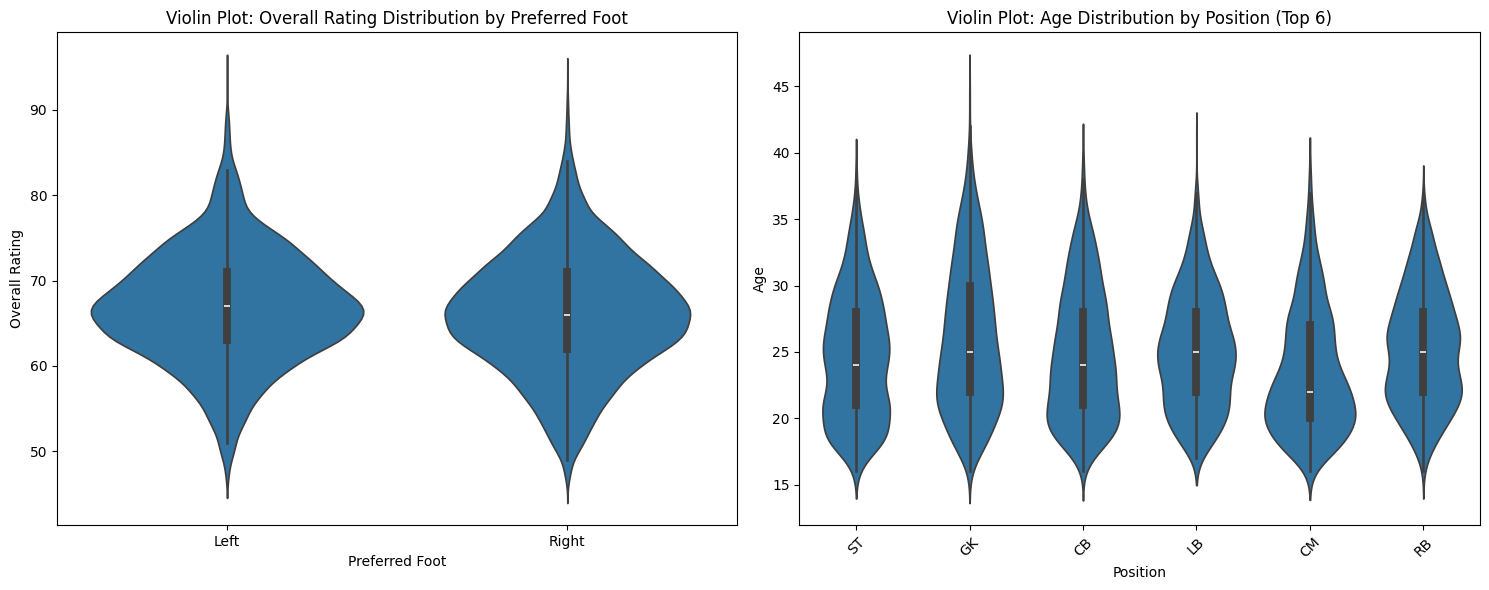

In [19]:
# Violin plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Violin plot 1: Overall rating by preferred foot
sns.violinplot(data=data, x='Preferred Foot', y='Overall', ax=axes[0])
axes[0].set_title('Violin Plot: Overall Rating Distribution by Preferred Foot')
axes[0].set_xlabel('Preferred Foot')
axes[0].set_ylabel('Overall Rating')

# Violin plot 2: Age distribution by top 6 positions
top_positions = data['Position'].value_counts().head(6).index
filtered_data = data[data['Position'].isin(top_positions)]
sns.violinplot(data=filtered_data, x='Position', y='Age', ax=axes[1])
axes[1].set_title('Violin Plot: Age Distribution by Position (Top 6)')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Age')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## t-SNE / UMAP Embeddings

t-SNE (t-Distributed Stochastic Neighbor Embedding) and UMAP (Uniform Manifold Approximation and Projection) are dimensionality reduction techniques that preserve local structure in high-dimensional data. They project high-dimensional data into 2D or 3D space while maintaining the relationships between similar data points. These visualizations are excellent for exploring clusters, identifying outliers, and understanding the overall structure of complex datasets. They're particularly useful when you have many features and want to visualize how different groups of data points relate to each other.

Running t-SNE (this may take a moment...)...


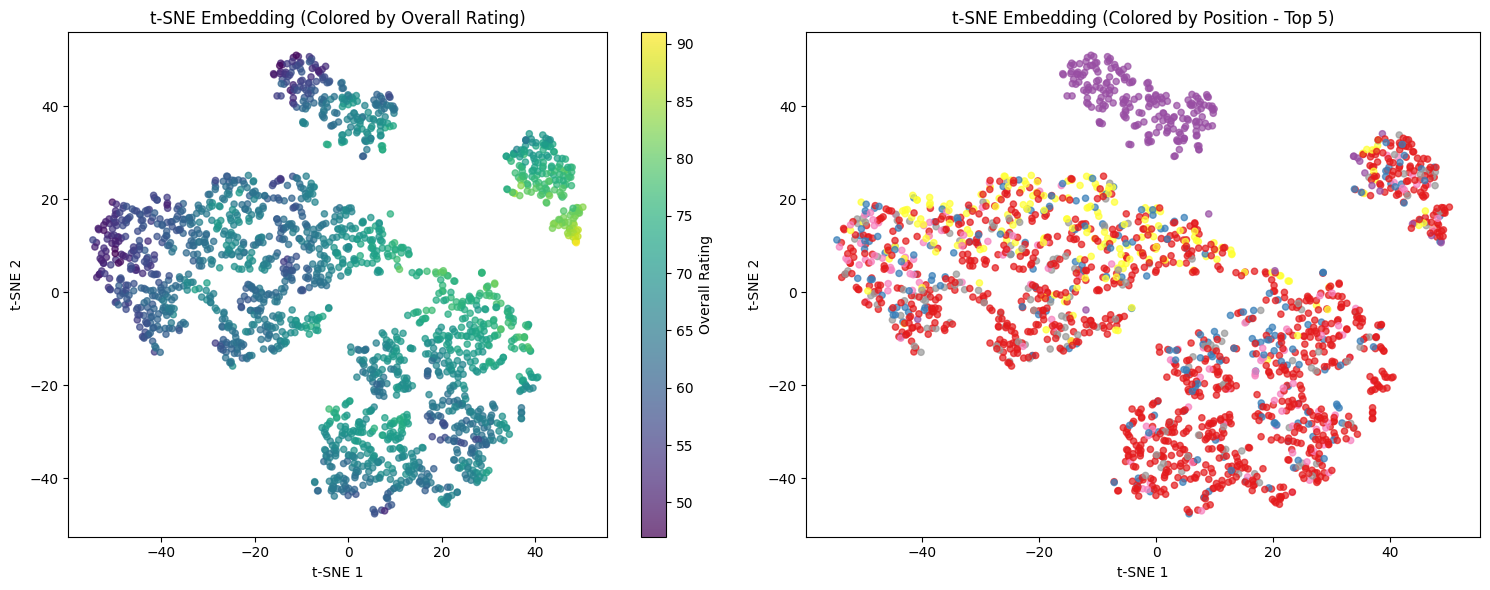

t-SNE visualization completed!


In [20]:
# t-SNE and UMAP embeddings
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Prepare numerical data for dimensionality reduction
numerical_cols = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 
                 'Skill Moves', 'Height', 'Weight', 'Release Clause']
# Remove rows with missing values for clean analysis
clean_data = data[numerical_cols].dropna()

# Sample data for faster computation (t-SNE can be slow on large datasets)
sample_size = 2000
if len(clean_data) > sample_size:
    sample_data = clean_data.sample(n=sample_size, random_state=42)
    sample_indices = sample_data.index
else:
    sample_data = clean_data
    sample_indices = clean_data.index

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sample_data)

# Apply t-SNE
print("Running t-SNE (this may take a moment...)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(scaled_data)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# t-SNE plot colored by Overall rating
scatter = axes[0].scatter(tsne_results[:, 0], tsne_results[:, 1], 
                         c=data.loc[sample_indices, 'Overall'], 
                         cmap='viridis', alpha=0.7, s=20)
axes[0].set_title('t-SNE Embedding (Colored by Overall Rating)')
axes[0].set_xlabel('t-SNE 1')
axes[0].set_ylabel('t-SNE 2')
plt.colorbar(scatter, ax=axes[0], label='Overall Rating')

# t-SNE plot colored by Position (top positions only)
top_positions = data['Position'].value_counts().head(5).index
position_colors = data.loc[sample_indices, 'Position'].apply(
    lambda x: top_positions.get_loc(x) if x in top_positions else -1
)

scatter2 = axes[1].scatter(tsne_results[:, 0], tsne_results[:, 1], 
                          c=position_colors, 
                          cmap='Set1', alpha=0.7, s=20)
axes[1].set_title('t-SNE Embedding (Colored by Position - Top 5)')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

print("t-SNE visualization completed!")